1. What is Time series analysis?
        A. Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.


2. Why & where Time Series is used?
        A. Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:
    * a) Business Forecasting
    * b) Understand past behavior
    * c) Plan the future
    * d) Evaluate current accomplishment
    

3. When shouldn't we use Time Series Analysis?
        A. We don't need to apply Time series in atleast the following 2 cases:

    * a) The dependant variable(y) (that is supposed to vary with time) is constant. Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.
    * b) The dependant variable(y) represent values that can be denoted as a mathematical function. Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself. No need of forecasting.
    

4. What are the components of Time Series?
        A. There are 4 components:
      * a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.
      * b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only
      * c) Noise or Irregularity - Spikes & troughs at random intervals
      * d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.
        

5. What is Stationarity?
        A. Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
    * a) It should have constant mean.
    * b) It should have constant variance or standard deviation.
    * c) Auto-covariance should not depend on time.

        Trend & Seasonality are two reasons why a Time Series is not stationaru & hence need to be corrected.
        

6. Why does Time Series(TS) need to be stationary?
     
     A. It is because of the following reasons:

    * a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.
    * b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.

7. Tests to check if a series is stationary or not

    A. There are 2 ways to check for Stationarity of a TS:
    * a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.
    * b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

8. What is ARIMA model?

    A. ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.


9. How to find value of P & Q for ARIMA ?
        A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q


10. What Is ADCF test?
        
        A. In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

        The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

        p value(0<=p<=1) should be as low as possible. Critical values at different confidence intervals should be close to the Test statistics value.
        

11. What is Exponential Smoothing?

        A. Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

        The raw data sequence is often represented by  xt  beginning at time  t=0 , and the output of the exponential smoothing algorithm is commonly written as  st , which may be regarded as a best estimate of what the next value of  x  will be. When the sequence of observations begins at time  t=0 , the simplest form of exponential smoothing is given by the formulas:

        s0=x0 
        st=α∗xt+(1−α)∗st−1  ,  t>0 
        where  α  is the smoothing factor, and  0<α<1 .

12. What is Exponential decay?

        A. A quantity is subject to exponential decay if it decreases at a rate proportional to its current value. Symbolically, this process can be expressed by the following differential equation, where N is the quantity and λ (lambda) is a positive rate called the exponential decay constant:

        dN/dt=−λN 
        The solution to this equation (see derivation below) is:
        N(t)=N0∗e−λt 
        where N(t) is the quantity at time t, and N0 = N(0) is the initial quantity, i.e. the quantity at time t = 0.

        Half Life is the time required for the decaying quantity to fall to one half of its initial value. It is denoted by  t1/2 . The half-life can be written in terms of the decay constant as:

        t1/2=ln(2)/λ

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [57]:
# Load data
df = pd.read_csv('/content/Historical data of Bitcoin Price_subset.csv', parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2016-01-01,BTCUSD,431.31,434.97,430.74,431.51,14.32,6204.29
1,2016-01-02,BTCUSD,431.51,434.99,430.32,433.07,25.38,10987.11
2,2016-01-03,BTCUSD,433.07,434.99,422.98,427.63,14.39,6159.16
3,2016-01-04,BTCUSD,427.63,433.96,426.56,431.08,51.50,22146.47
4,2016-01-05,BTCUSD,431.08,434.73,429.00,431.32,33.76,14533.76


In [0]:

# Resampling to daily frequency
df.index = df.Date
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [59]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11',
               '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
               '2019-02-16', '2019-02-17'],
              dtype='datetime64[ns]', name='Date', length=1144, freq='D')

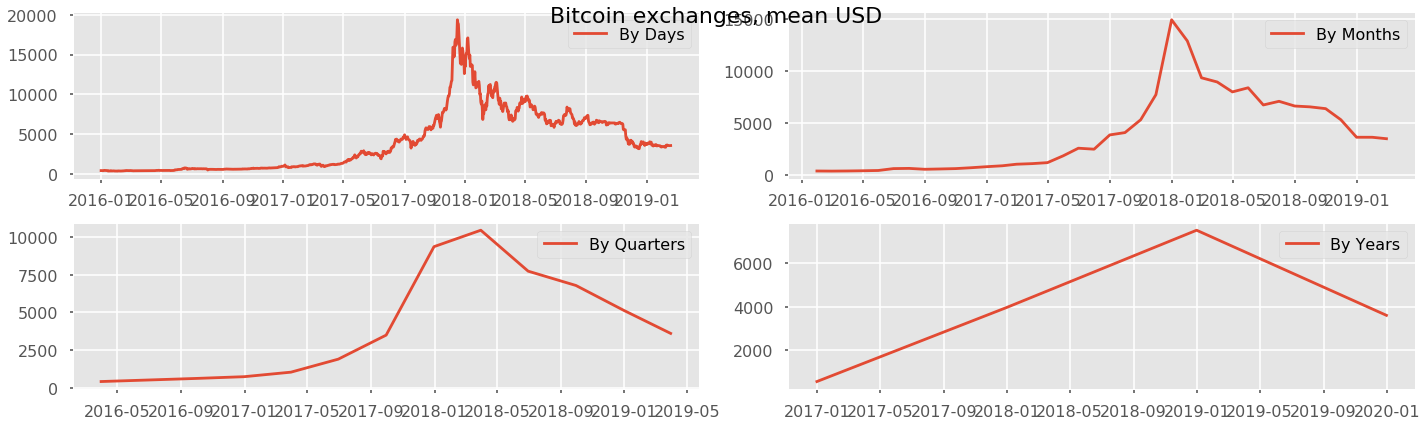

In [60]:
# PLOTS
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

plt.tight_layout()
plt.show()

### Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.573824


<Figure size 1080x576 with 0 Axes>

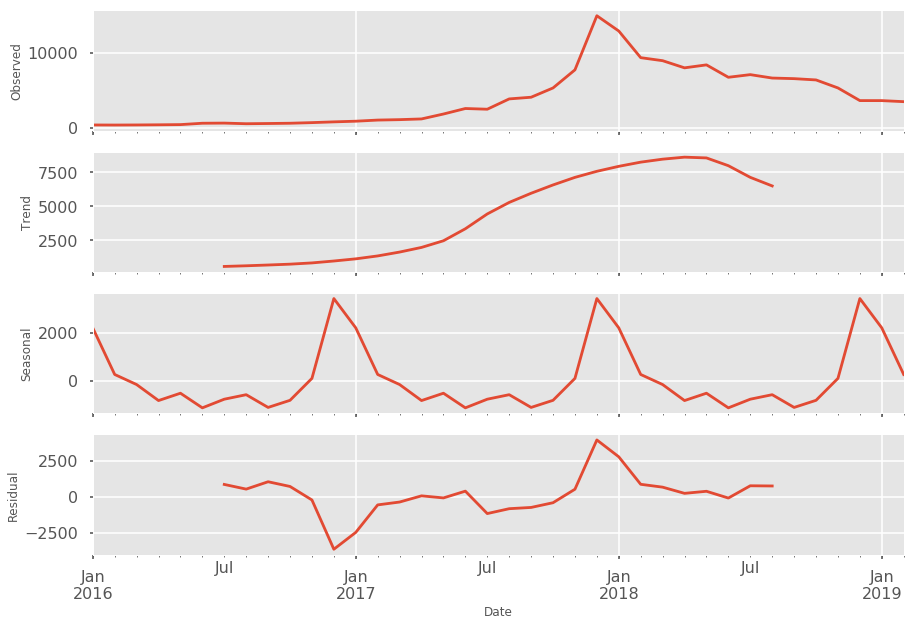

In [61]:
plt.figure(figsize=[15,8])
sm.tsa.seasonal_decompose(df_month.Close).plot();
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])


### The series are not stationary.

### Box-Cox Transformations

Dickey–Fuller test: p=0.532276


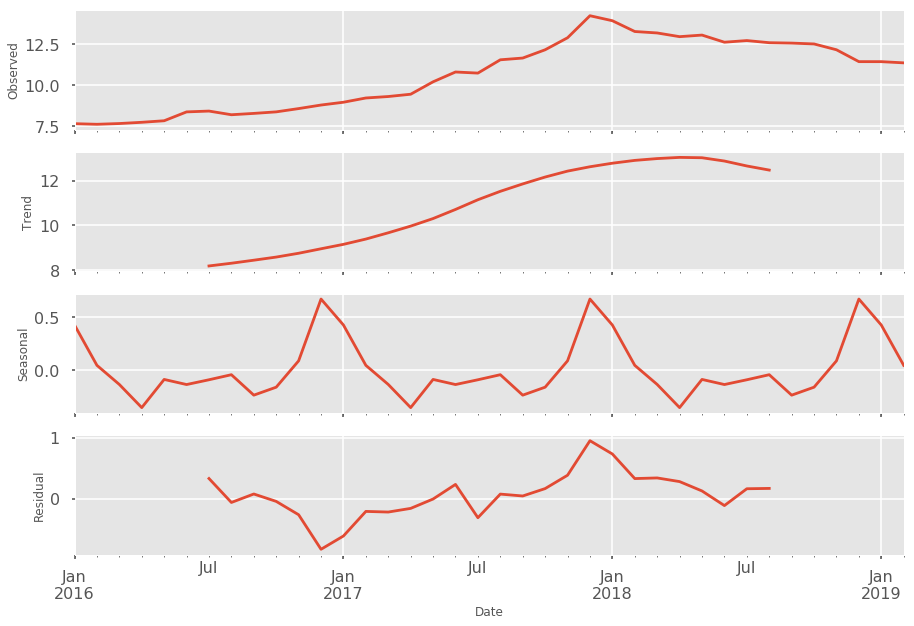

In [62]:
# Box-Cox Transformations
df_month['Close'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])
sm.tsa.seasonal_decompose(df_month.Close).plot();

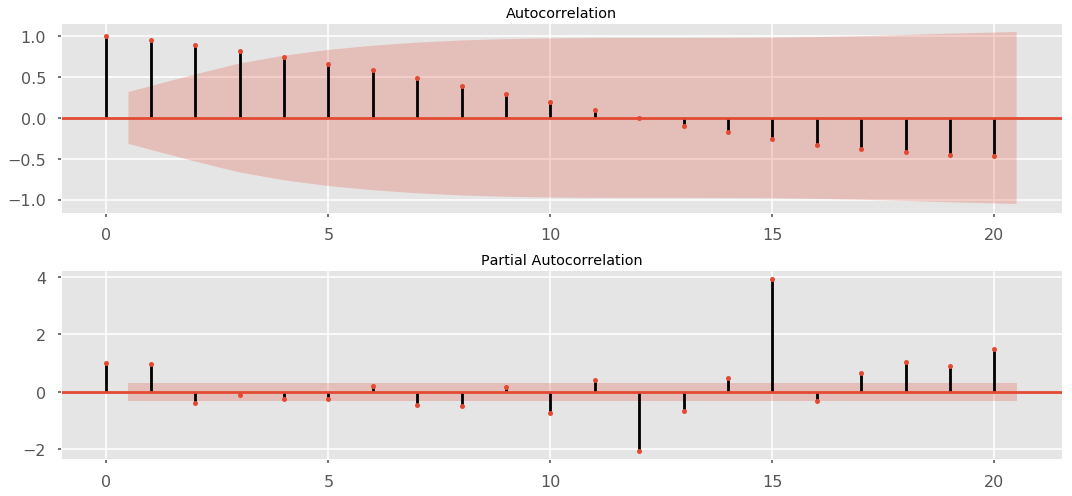

In [63]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Close, lags=20, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Close, lags=20, ax=ax)
plt.tight_layout()
plt.show()

In [64]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [65]:
# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (1, 2, 2, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 0, 2, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 1)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (2, 2, 2, 1)


In [66]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters        aic
13  (1, 1, 1, 0)  44.832540
10  (1, 0, 1, 0)  44.917207
4   (0, 1, 1, 0)  45.640060
1   (0, 0, 1, 0)  45.736415
11  (1, 0, 2, 0)  46.354483
                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -18.416
Date:                            Sat, 14 Sep 2019   AIC                             44.833
Time:                                    03:24:06   BIC                             49.708
Sample:                                01-31-2016   HQIC                            46.185
                                     - 02-28-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

Analysis of residues

Dickey–Fuller test:: p=0.000000


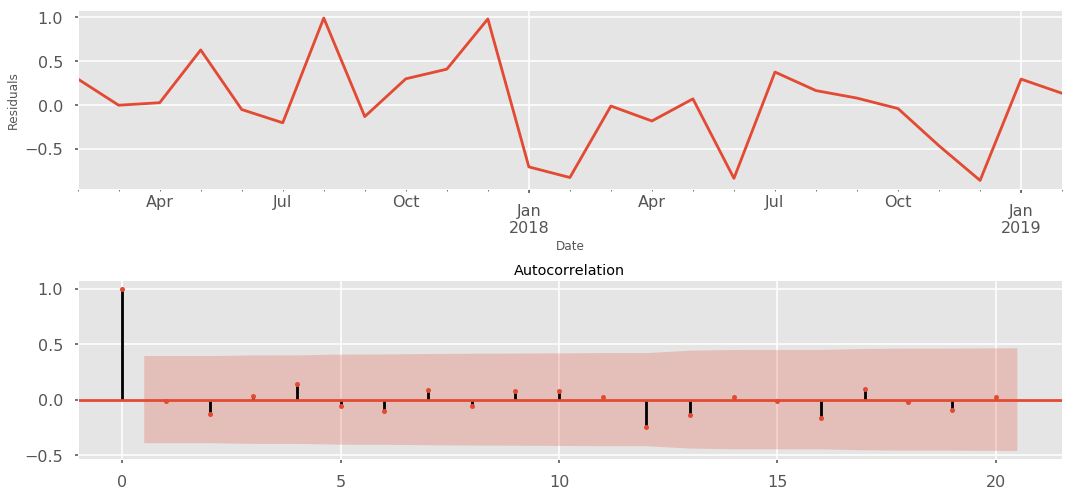

In [67]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [0]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

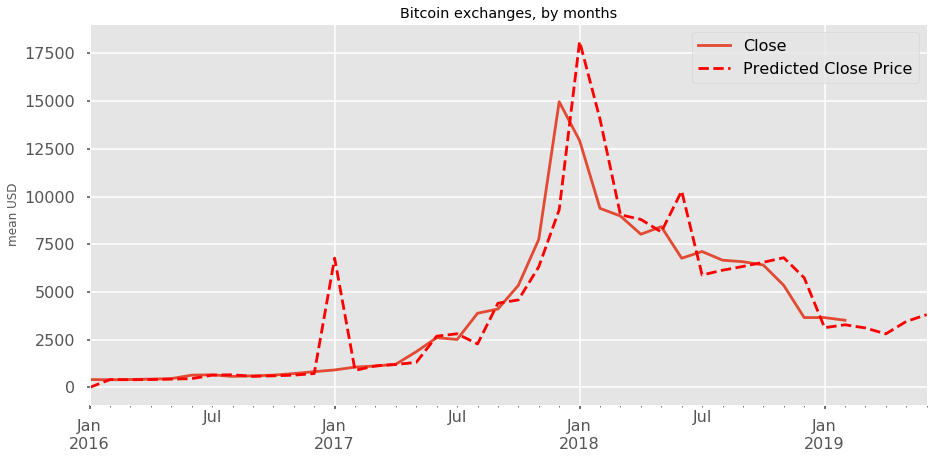

In [74]:
# Prediction
df_month2 = df_month[['Close']]
df_month2.Close = df_month2.Close.apply(lambda x: invboxcox(x, lmbda) )
date_list = [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))

df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()
